In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Visualizing the PCA transformation

### Dimension reduction
- More efficient storage and computation
- Remove less-informative 'noise' features
- ... which cause problems for prediction tasks, e.g. classification, regression

### Principal Component Analysis (PCA)
- Fundamental dimension reduction technique
- First step 'decorrelation' (considered here)
- Second step reduces dimension (considered later)

### PCA aligns data with axes
- Rotates data samples to be aligned with axees
- Shifts data samples so they havemean 0
- No information is lost

### PCA follows the fit/transform pattern
- PCA is a scikit-learn component like KMeans or StandardScaler
- fit() learns the transformation from given data
- transform() applies the learned transformation
- transform() can also be applied to new data

### Using scikit-learn PCA
- samples = array of two features(total_phenols & od280)

In [2]:
wine = pd.read_csv('wine.csv')
samples = wine[['total_phenols', 'od280']].values
samples[:5]

array([[2.8 , 3.92],
       [2.65, 3.4 ],
       [2.8 , 3.17],
       [3.85, 3.45],
       [2.8 , 2.93]])

In [3]:
samples.shape

(178, 2)

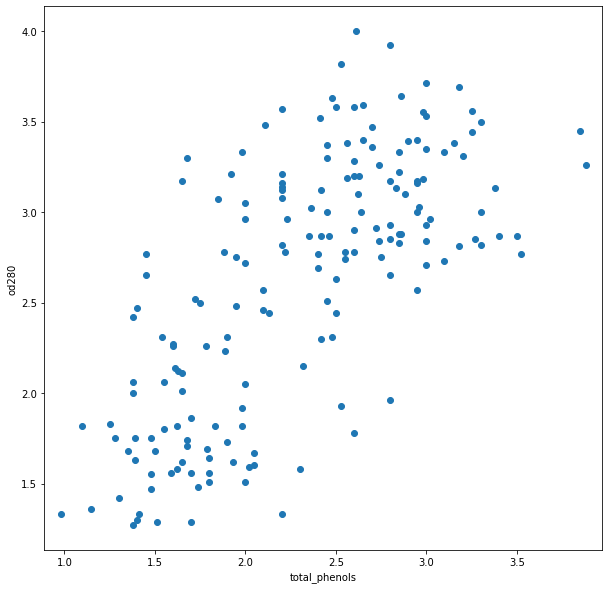

0.6999493647911863


In [4]:
plt.figure(figsize=(10, 10))

# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Assign the 0th column of samples: total_phenols
total_phenols = samples[:, 0]

# Assign the 1st column of samples: od280
od280 = samples[:, 1]

# Scatter plot width vs length
plt.scatter(total_phenols, od280)
plt.xlabel('total_phenols')
plt.ylabel('od280')
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(total_phenols, od280)

# Display the correlation
print(correlation)

### PCA features
- Rows of transformed correspond to samples
- Columns of transformed are the 'PCA features'
- Row gives PCA feature values of corresponding sample

In [5]:
from sklearn.decomposition import PCA
model = PCA()
model.fit(samples)
transformed = model.transform(samples)
transformed[:5]

array([[-1.32771994,  0.45139607],
       [-0.83249607,  0.23309966],
       [-0.75216868, -0.02947892],
       [-1.64026613, -0.65572401],
       [-0.56799228, -0.18335891]])

In [6]:
transformed.shape

(178, 2)

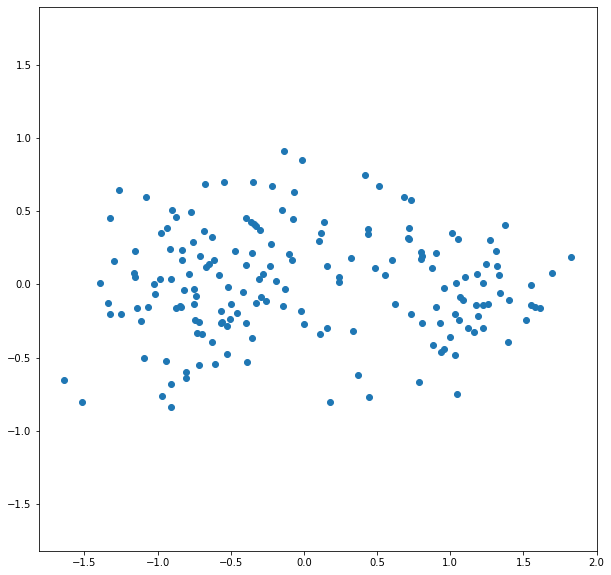

-4.7704895589362195e-17


In [7]:
plt.figure(figsize=(10, 10))

# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to samples: pca_features
pca_features = model.fit_transform(samples)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

### PCA features are not correlated
- Features of dataset are often correlated, e.g. total_phenols and od280
- PCA aligns the data with axes
- Resulting PCA features are not lineary correlalated ('decorrelation')

### Principal components
- 'Principal componets' = direction of variance
- PCA aligns principal components with the axes
- Available as 'components_' attribute of PCA object
- Each row defines displacement from mean

In [8]:
model.components_

array([[-0.64116665, -0.76740167],
       [-0.76740167,  0.64116665]])

### Correlated data in nature
- You are given an array grains giving the width and length of samples of grain. You suspect that width and length will be correlated. To confirm this, make a scatter plot of width vs length and measure their Pearson correlation.

In [9]:
grains = pd.read_csv('seeds-width-vs-length.csv', header=None).values

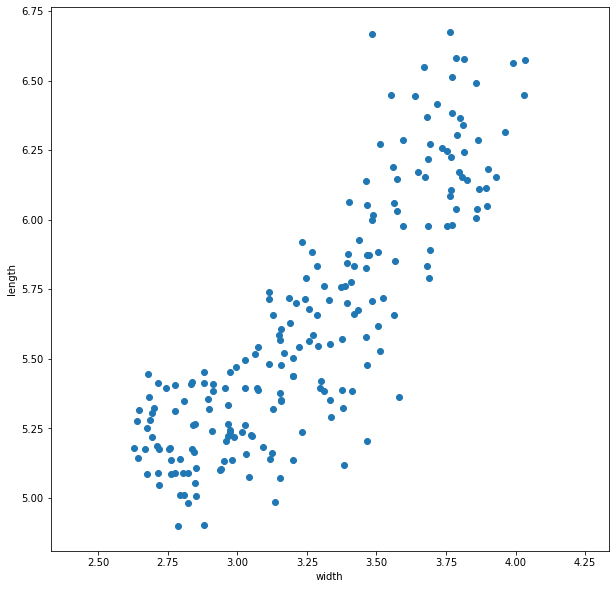

0.8604149377143466


In [10]:
plt.figure(figsize=(10, 10))

# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Assign the 0th column of grains: width
width = grains[:, 0]

# Assign the 1st column of grains: length
length = grains[:, 1]

# Scatter plot width vs length
plt.scatter(width, length)
plt.xlabel('width')
plt.ylabel('length')
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width, length)

# Display the correlation
print(correlation)

Great work! As you would expect, the width and length of the grain samples are highly correlated.

### Decorrelating the grain measurements with PCA
- You observed in the previous exercise that the width and length measurements of the grain are correlated. Now, you'll use PCA to decorrelate these measurements, then plot the decorrelated points and measure their Pearson correlation.

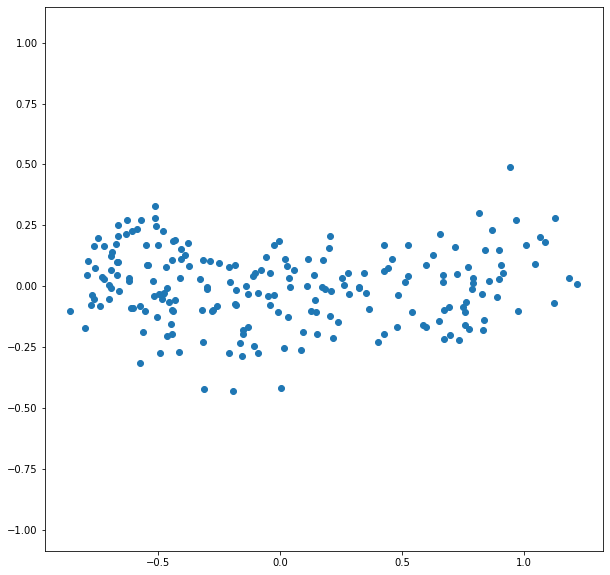

2.2659825404947043e-17


In [11]:
plt.figure(figsize=(10, 10))

# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

Excellent! You've successfully decorrelated the grain measurements with PCA!

## Intrinsic dimension

### Intrinsic dimension of a flight path
- 2 features: longitude and latitude at points along a flight path
- Dataset appears to be 2-dimensional
- But can approximate using one feature: displacement along flight path
- Is intrinsically 1-dimensional

### Intrinsic dimension
- Intrinsic dimension = number of features needed to approximate the dataset
- Essential idea behind dimension reduction
- What is the most compact representation of the samples?
- Can be detected with PCA

### Versicolor dataset
- 'versicolor', one of the iris species
- Only 3 features: sepal length, sepal width, and petal width
- Samples are pints in 3D space

In [12]:
from sklearn import datasets
iris = pd.DataFrame(datasets.load_iris()['data'])
iris.columns = datasets.load_iris()['feature_names']
iris['target'] = datasets.load_iris()['target']
iris['target_names'] = iris['target'].map({0:'setosa', 1:'versicolor', 2:'virginica'})
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [13]:
iris_df = pd.DataFrame(datasets.load_iris()['data'])
iris_df.columns = datasets.load_iris()['feature_names']
iris_df['target'] = datasets.load_iris()['target']
iris_df['target_names'] = iris_df['target'].map({0:'setosa', 1:'versicolor', 2:'virginica'})
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [14]:
iris.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'target_names'],
      dtype='object')

In [15]:
samples = iris[iris['target_names']=='versicolor'][['sepal length (cm)', 'sepal width (cm)', 'petal width (cm)']].values

### Plotting the variances of PCA features
- samples = array of versicolor samples

In [16]:
from sklearn.decomposition import PCA
model = PCA()
model.fit(samples)

PCA()

In [17]:
model.n_components_

3

In [18]:
features = range(model.n_components_)

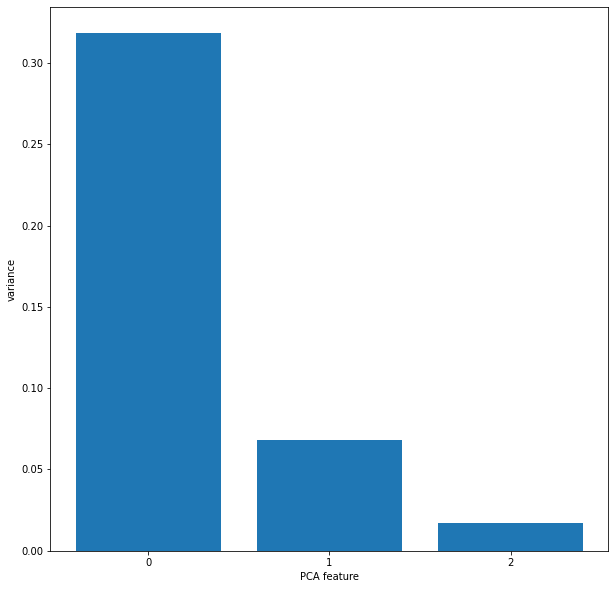

In [19]:
plt.figure(figsize=(10, 10))

plt.bar(features, model.explained_variance_)
plt.xticks(features)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.show()

### Intrinsic dimension can be ambiguous
- Intrinsic dimension is an idealization
- ... there is not always one correct answer!
- Piedmont wines: could arge for 2, or for 3, or more

In [20]:
wine = pd.read_csv('wine.csv')
wine_samples = wine.drop(['class_label', 'class_name'], axis=1).values

from sklearn.preprocessing import StandardScaler
wine_samples = StandardScaler().fit_transform(wine_samples)

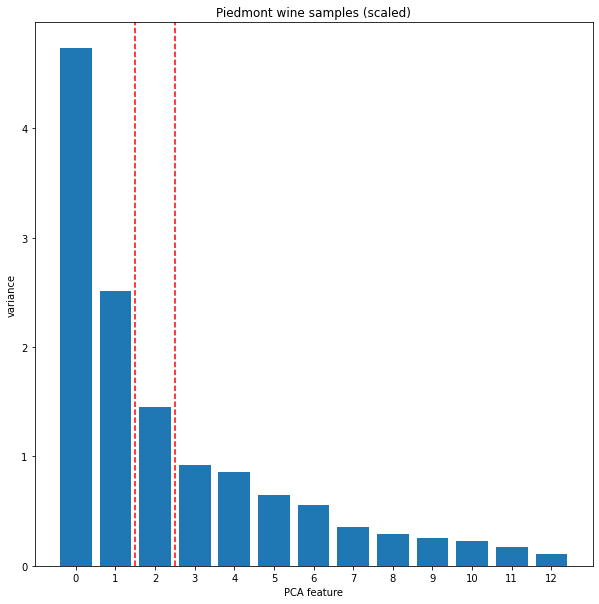

In [21]:
from sklearn.decomposition import PCA
model = PCA()
model.fit(wine_samples)
features = range(model.n_components_)

plt.figure(figsize=(10, 10))

plt.bar(features, model.explained_variance_)
plt.xticks(features)
plt.title('Piedmont wine samples (scaled)')
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.axvline(1.5, linestyle='--', color='red')
plt.axvline(2.5, linestyle='--', color='red')
plt.show()

In [22]:
wine_samples

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

### The first principal component
- The first principal component of the data is the direction in which the data varies the most. In this exercise, your job is to use PCA to find the first principal component of the length and width measurements of the grain samples, and represent it as an arrow on the scatter plot.

- The array grains gives the length and width of the grain samples. PyPlot (plt) and PCA have already been imported for you.

In [23]:
grains = pd.read_csv('seeds-width-vs-length.csv', header=None).values

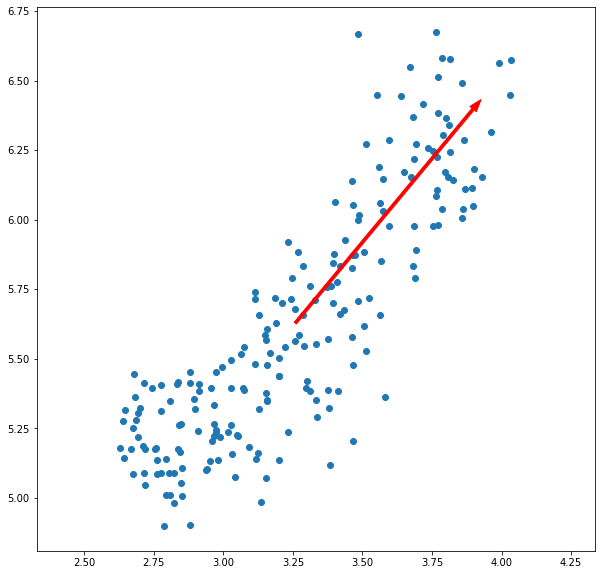

In [24]:
plt.figure(figsize=(10, 10))

# Make a scatter plot of the untransformed points
plt.scatter(grains[:,0], grains[:,1])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0, :]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

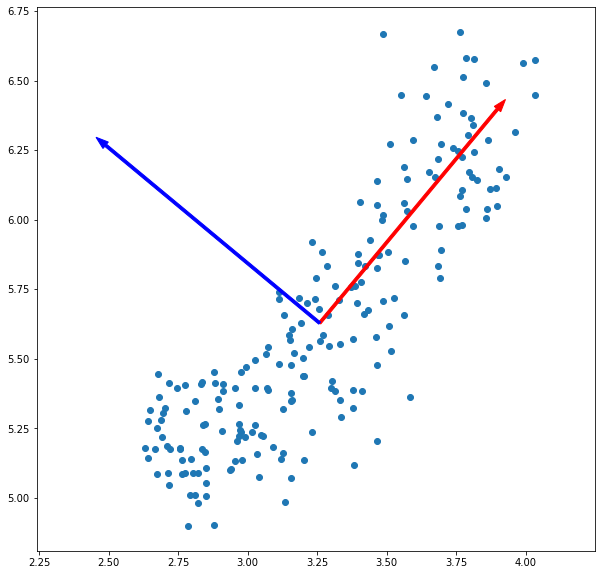

In [25]:
plt.figure(figsize=(10, 10))

# Make a scatter plot of the untransformed points
plt.scatter(grains[:,0], grains[:,1])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0, :]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)
plt.arrow(mean[0], mean[1], model.components_[1, 0], model.components_[1, 1], color='blue', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

### Variance of the PCA features
- The fish dataset is 6-dimensional. But what is its intrinsic dimension? Make a plot of the variances of the PCA features to find out. As before, samples is a 2D array, where each row represents a fish. You'll need to standardize the features first.

In [26]:
samples = pd.read_csv('fish.csv', header=None).drop(0, axis=1).values

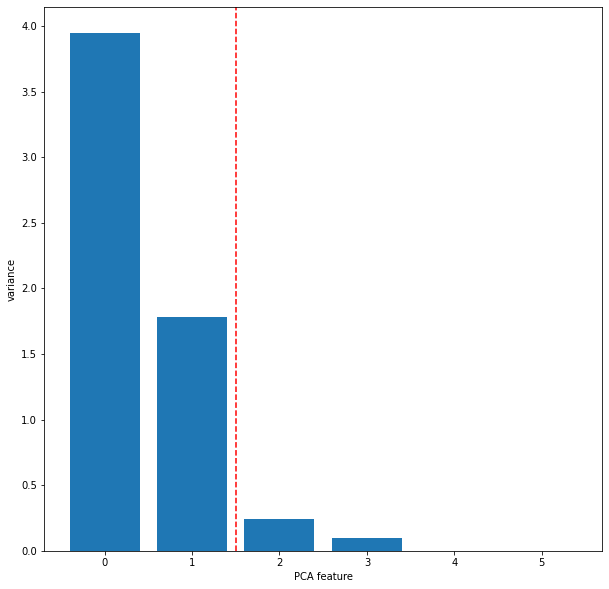

In [27]:
plt.figure(figsize=(10, 10))

# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.axvline(1.5, linestyle='--', color='red')
plt.xticks(features)
plt.show()

Great work! It looks like PCA features 0 and 1 have significant variance. Since PCA features 0 and 1 have significant variance, the intrinsic dimension of this dataset appears to be 2.

## Dimension reduction with PCA

### Dimension reduction
- Represents same data, using less features
- Important part of machine-learning pipelines
- Can be performed using PCA

### Dimension reduction with PCA
- PCA features are in decreasing order of variance
- Assumes the low variance features are 'noise' and high variance features are informative
- Specifiy how many features to keep, e.g. PCA(n_components=2), which keeps the first 2 PCA features
- Intrinsic dimension is a good choice

### Dimension reduction of iris dataset
- samples = array of iris measurements (4 features)
- species = list ofiris species numbers

In [28]:
from sklearn import datasets
samples = datasets.load_iris()['data']
species = datasets.load_iris()['target']

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(samples)

PCA(n_components=2)

In [30]:
transformed = pca.transform(samples)
transformed.shape

(150, 2)

### Iris dataset in 2 dimensions
- PCA has reduced the dimension to 2
- Retianed the 2 PCA features with highest variance
- Important information preserved: species remain distict

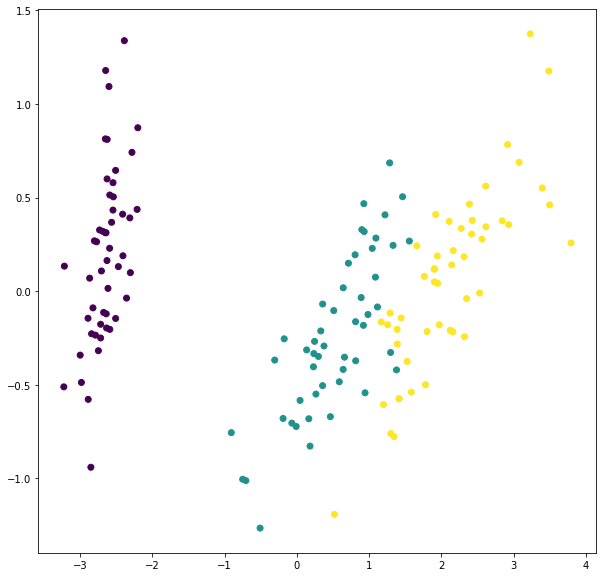

In [31]:
plt.figure(figsize=(10, 10))
xs = transformed[:, 0]
ys = transformed[:, 1]
plt.scatter(xs, ys, c=species)
plt.show()

### Dimension reduction with PCA
- Discards low variance PCA features
- Assumes the high variance features are informative
- Assumption typically holds in practice (e.g. for iris)

### Word frequency arrays
- Rows represent documents, columns represent words
- Entries measure presence of each word in each document
- ... measure using 'tf-idf' (more later)

### Sparse arrays and csr_matrix
- 'Sparse': most entries are zero
- Can use scipy.sparse.csr_matrix instead of NumPy arry
- csr_matrix remembers only the non-zero entries (saves space!)

### TruncatedSVD and csr_matrix
- scikit-learn PCA doesn't support csr_matrix
- Use scikit-learn TruncatedSVD instead
- Performs same transformation

In [ ]:
from sklearn.decomposition import TruncatdSVD
model = TruncatedSVD(n_components=3)
model.fit(documents)  # documents is csr_matrix
TruncatedSVD(algorithm='randomized', ...)
transformed = model.transform(documents)

### Dimension reduction of the fish measurements
- In a previous exercise, you saw that 2 was a reasonable choice for the "intrinsic dimension" of the fish measurements. Now use PCA for dimensionality reduction of the fish measurements, retaining only the 2 most important components.

- The fish measurements have already been scaled for you, and are available as scaled_samples.

In [33]:
samples = pd.read_csv('fish.csv', header=None).drop(0, axis=1).values
from sklearn.preprocessing import StandardScaler
scaled_samples = StandardScaler().fit_transform(samples)
scaled_samples.shape

(85, 6)

In [34]:
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA model with 2 components: pca
pca = PCA(n_components=2)

# Fit the PCA instance to the scaled samples
pca.fit(scaled_samples)

# Transform the scaled samples: pca_features
pca_features = pca.transform(scaled_samples)

# Print the shape of pca_features
print(pca_features.shape)

(85, 2)


Superb! You've successfully reduced the dimensionality from 6 to 2.

### A tf-idf word-frequency array
- In this exercise, you'll create a tf-idf word frequency array for a toy collection of documents. For this, use the TfidfVectorizer from sklearn. It transforms a list of documents into a word frequency array, which it outputs as a csr_matrix. It has fit() and transform() methods like other sklearn objects.

- You are given a list documents of toy documents about pets. Its contents have been printed in the IPython Shell.

In [35]:
documents = ['cats say meow', 'dogs say woof', 'dogs chase cats']

In [36]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer() 

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(documents)

# Print result of toarray() method
print(csr_mat.toarray())

# Get the words: words
words = tfidf.get_feature_names()

# Print words
print(words)

[[0.51785612 0.         0.         0.68091856 0.51785612 0.        ]
 [0.         0.         0.51785612 0.         0.51785612 0.68091856]
 [0.51785612 0.68091856 0.51785612 0.         0.         0.        ]]
['cats', 'chase', 'dogs', 'meow', 'say', 'woof']


Great work! You'll now move to clustering Wikipedia articles!

### Clustering Wikipedia part I
- You saw in the video that TruncatedSVD is able to perform PCA on sparse arrays in csr_matrix format, such as word-frequency arrays. Combine your knowledge of TruncatedSVD and k-means to cluster some popular pages from Wikipedia. In this exercise, build the pipeline. In the next exercise, you'll apply it to the word-frequency array of some Wikipedia articles.

- Create a Pipeline object consisting of a TruncatedSVD followed by KMeans. (This time, we've precomputed the word-frequency matrix for you, so there's no need for a TfidfVectorizer).

- The Wikipedia dataset you will be working with was obtained from here.

In [37]:
# Perform the necessary imports
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=6)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd, kmeans)

Excellent! Now that you have set up your pipeline, you will use it in the next exercise to cluster the articles.

### Clustering Wikipedia part II
- It is now time to put your pipeline from the previous exercise to work! You are given an array articles of tf-idf word-frequencies of some popular Wikipedia articles, and a list titles of their titles. Use your pipeline to cluster the Wikipedia articles.

- A solution to the previous exercise has been pre-loaded for you, so a Pipeline pipeline chaining TruncatedSVD with KMeans is available.

In [38]:
titles = pd.read_csv('wikipedia-vectors.csv', index_col=0).columns
articles = pd.read_csv('wikipedia-vectors.csv', index_col=0).values.T
from scipy.sparse import csr_matrix
articles = csr_matrix(articles)
articles.shape

(60, 13125)

In [39]:
# Import pandas
import pandas as pd

# Fit the pipeline to articles
pipeline.fit(articles)

# Calculate the cluster labels: labels
labels = pipeline.predict(articles)

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'article': titles})

# Display df sorted by cluster label
print(df.sort_values('label'))

    label                                        article
0       0                                       HTTP 404
1       0                                 Alexa Internet
2       0                              Internet Explorer
3       0                                    HTTP cookie
4       0                                  Google Search
5       0                                         Tumblr
6       0                    Hypertext Transfer Protocol
7       0                                  Social search
8       0                                        Firefox
9       0                                       LinkedIn
19      1  2007 United Nations Climate Change Conference
18      1  2010 United Nations Climate Change Conference
17      1  Greenhouse gas emissions by the United States
16      1                                        350.org
15      1                                 Kyoto Protocol
14      1                                 Climate change
13      1                      